In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

customers_df = pd.read_csv('dataset/Customers.csv')
products_df = pd.read_csv('dataset/Products.csv')
transactions_df = pd.read_csv('dataset/Transactions.csv')

plt.rcParams['font.family'] = 'C059'

In [5]:
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

merged_df['Revenue'] = merged_df['Quantity'] * merged_df['Price_y']

clustering_data = merged_df.groupby('CustomerID').agg(
    total_revenue=('Revenue', 'sum'),
    avg_quantity=('Quantity', 'mean'),
    total_transactions=('TransactionID', 'count')
).reset_index()

In [6]:
# Scale the features for clustering
scaler = StandardScaler()
scaled_clustering_data = scaler.fit_transform(clustering_data.drop(columns=['CustomerID']))

# Perform KMeans clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_clustering_data)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_clustering_data, clustering_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

Davies-Bouldin Index: 0.93


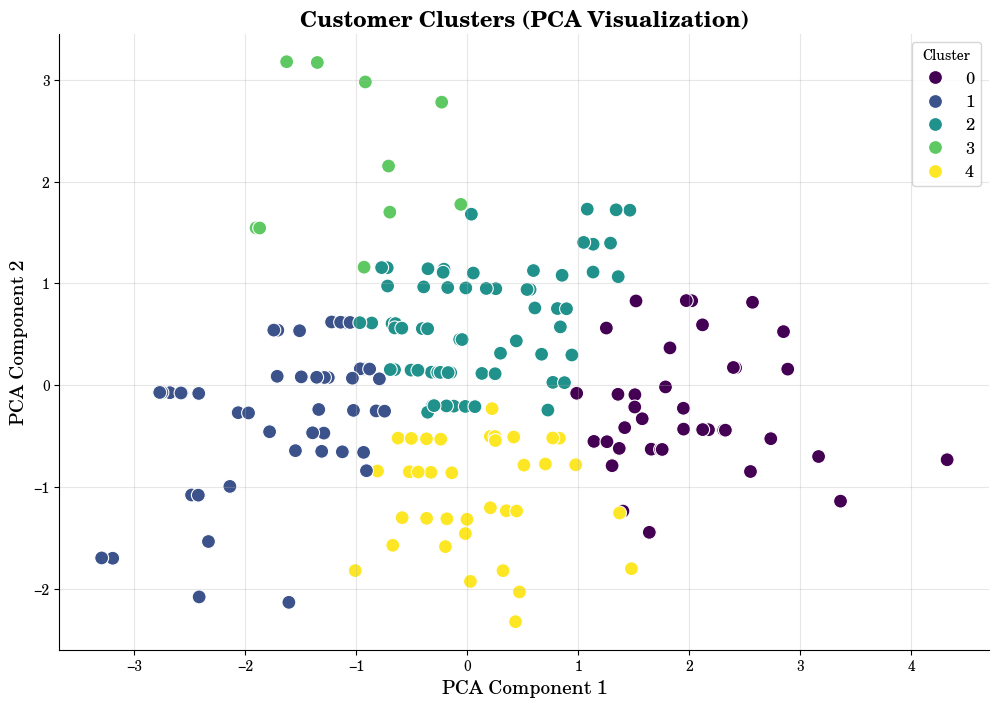

In [7]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_clustering_data)
clustering_data['PCA1'] = pca_data[:, 0]
clustering_data['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=clustering_data, palette='viridis', s=100
)
plt.title('Customer Clusters (PCA Visualization)', fontsize=16, weight='bold')
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.grid(alpha=0.3)
sns.despine()
plt.show()